<a href="https://colab.research.google.com/github/Hardik-Sankhka/TESLA-STOCK-PRICE-PREDICTION/blob/main/TESLA%20STOCK%20PRICE%20PREDICTION%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TESLA STROCK PREDICTION TIME PERIOD [Jun 30, 2010 - Sep 26, 2022]

In [1]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import style
style.use("fivethirtyeight")

In [3]:
#Read the csv file into a DataFrame
df = pd.read_csv(r"/content/TSLA.csv")

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
1,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
3,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
4,2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3081 non-null   object 
 1   Open       3081 non-null   float64
 2   High       3081 non-null   float64
 3   Low        3081 non-null   float64
 4   Close      3081 non-null   float64
 5   Adj Close  3081 non-null   float64
 6   Volume     3081 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 168.6+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3081.000000,3081.000000,3081.000000,3081.000000,3081.000000,3.081000e+03
mean,55.819001,57.068049,54.468935,55.804355,55.804355,9.336657e+07
std,94.263378,96.433006,91.856534,94.181896,94.181896,8.231128e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,8.212667,8.370667,7.974000,8.140000,8.140000,4.150140e+07
50%,15.990667,16.248667,15.705333,16.003332,16.003332,7.539900e+07
75%,23.600000,23.965334,23.280001,23.564667,23.564667,1.172820e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [8]:
#Make two new columns which will be used for making predictions.
df["HL_Perc"] = (df["High"]-df["Low"]) / df["Low"] * 100
df["CO_Perc"] = (df["Close"] - df["Open"]) / df["Open"] * 100

In [9]:
dates = np.array(df["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [10]:
df = df[["HL_Perc", "CO_Perc", "Adj Close", "Volume"]]

In [11]:
#Define the label column
df["PriceNextMonth"] = df["Adj Close"].shift(-30)

In [12]:
df.tail()

,HL_Perc,CO_Perc,Adj Close,Volume,PriceNextMonth
3076,4.042985,2.992439,309.070007,60231200,NaN
3077,2.536161,0.593010,308.730011,61642800,NaN
3078,4.380795,-2.429537,300.799988,62555700,NaN
3079,5.412498,-3.758417,288.589996,70545400,NaN
3080,4.281208,-2.741181,275.329987,63615400,NaN


In [13]:
#Make fetaure and label arrays
X = np.array(df.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
df.dropna(inplace = True)
y = np.array(df["PriceNextMonth"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [14]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [15]:
#Define the prediction model
model = RandomForestRegressor()

In [16]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [17]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.9647550564287724


In [18]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [19]:
predictions = model.predict(X_Check)

In [20]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = df["Adj Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

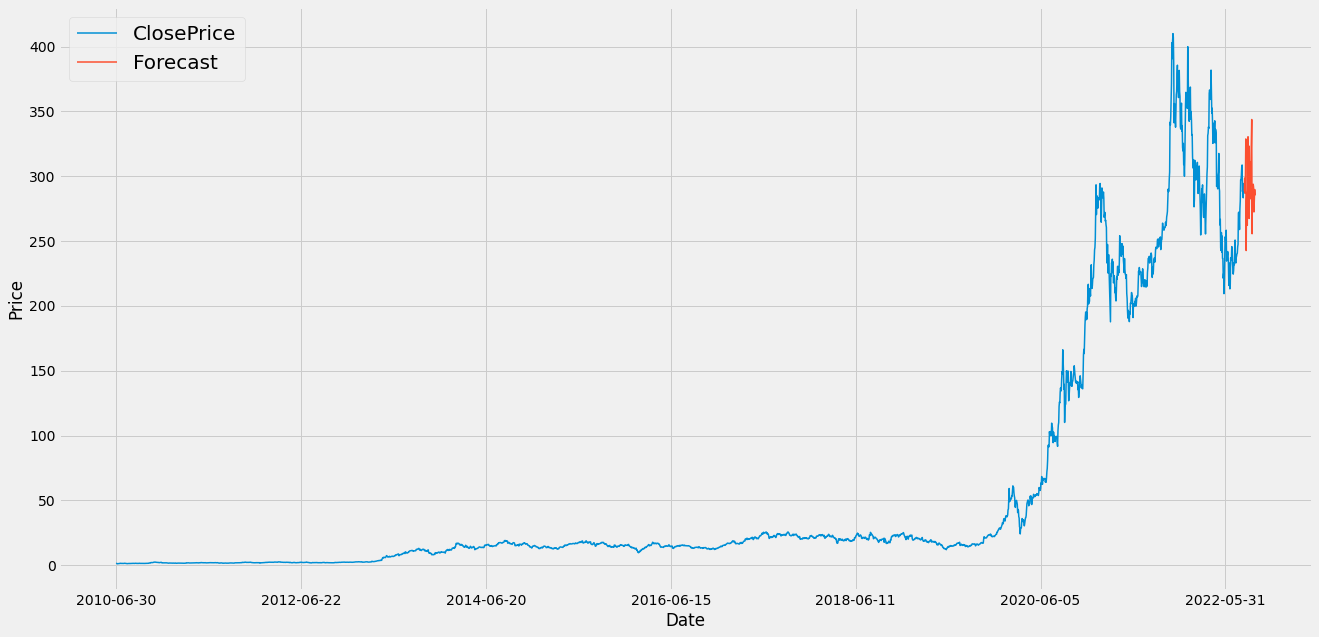

In [21]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')